In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Early Stage Diabetes Risk Prediction.csv to Early Stage Diabetes Risk Prediction.csv


In [ ]:
df=pd.read_csv('Early Stage Diabetes Risk Prediction.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
for column in df.columns:
    if column != 'Age' and df[column].dtype == 'object':
        df[column] = df[column].replace({'Yes': 1, 'No': 0})
        df[column]=df[column].replace({'Male':0, 'Female':1})
        df[column]=df[column].replace({'Positive':1,'Negative':0})

print(df.head())

   Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       0         0           1                   0         1   
1   58       0         0           0                   0         1   
2   41       0         1           0                   0         1   
3   45       0         0           0                   1         1   
4   60       0         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1                0                 1         1 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [ ]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dropna(inplace=True)

In [ ]:
for i in range(df.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [ ]:
for i in range(df.shape[1]):
    print(df.iloc[:,i].unique())
    print(df.iloc[:,i].value_counts())

[40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Age
35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: count, dtype: int64
[0 1]
Gender
0    328
1    192
Name: count, dtype: int64
[0 1]
Polyuria
0    262
1    258
Name: count, dtype: int64
[1 0]
Polydipsia
0    287
1    233
Name: count, dtype: int64
[0 1]
sudden weight loss
0    303
1    217
Name: count, dtype: int64
[1 0]
weakness
1    305
0    215
Name: count, dtype: int64
[0 1]
Polyphagia
0    283
1    237
Name: count, d

In [ ]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].value_counts())

Age
35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: count, dtype: int64
Gender
0    328
1    192
Name: count, dtype: int64
Polyuria
0    262
1    258
Name: count, dtype: int64
Polydipsia
0    287
1    233
Name: count, dtype: int64
sudden weight loss
0    303
1    217
Name: count, dtype: int64
weakness
1    305
0    215
Name: count, dtype: int64
Polyphagia
0    283
1    237
Name: count, dtype: int64
Genital thrush
0    404
1    116
Name: count, dtype: int64
visual blurring
0    287
1    233
Name: count, dtype: int64
Itching
0    267
1    253
Name: count, dtype: int64
Irritabili

In [ ]:
print(df)

     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       0         0           1                   0         1   
1     58       0         0           0                   0         1   
2     41       0         1           0                   0         1   
3     45       0         0           0                   1         1   
4     60       0         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       1         1           1                   1         0   
516   48       1         1           1                   1         1   
517   58       1         1           1                   1         1   
518   32       1         0           0                   0         1   
519   42       0         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0               0                0        1   

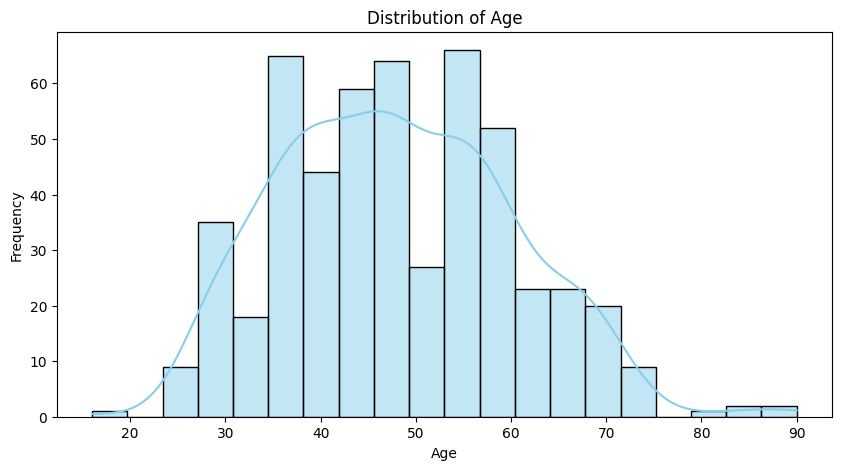

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

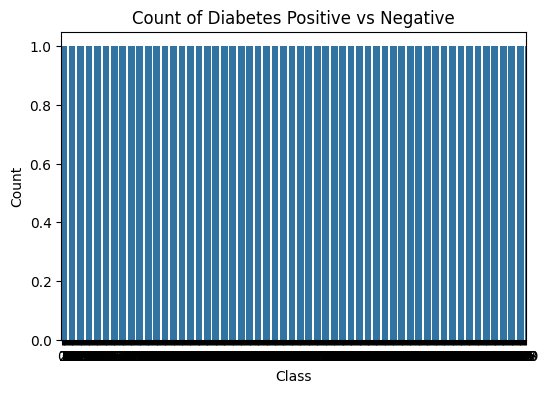

In [ ]:
# 2. Count plot of the target variable ('class')
plt.figure(figsize=(6, 4))
sns.countplot(df['class'])
plt.title('Count of Diabetes Positive vs Negative')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

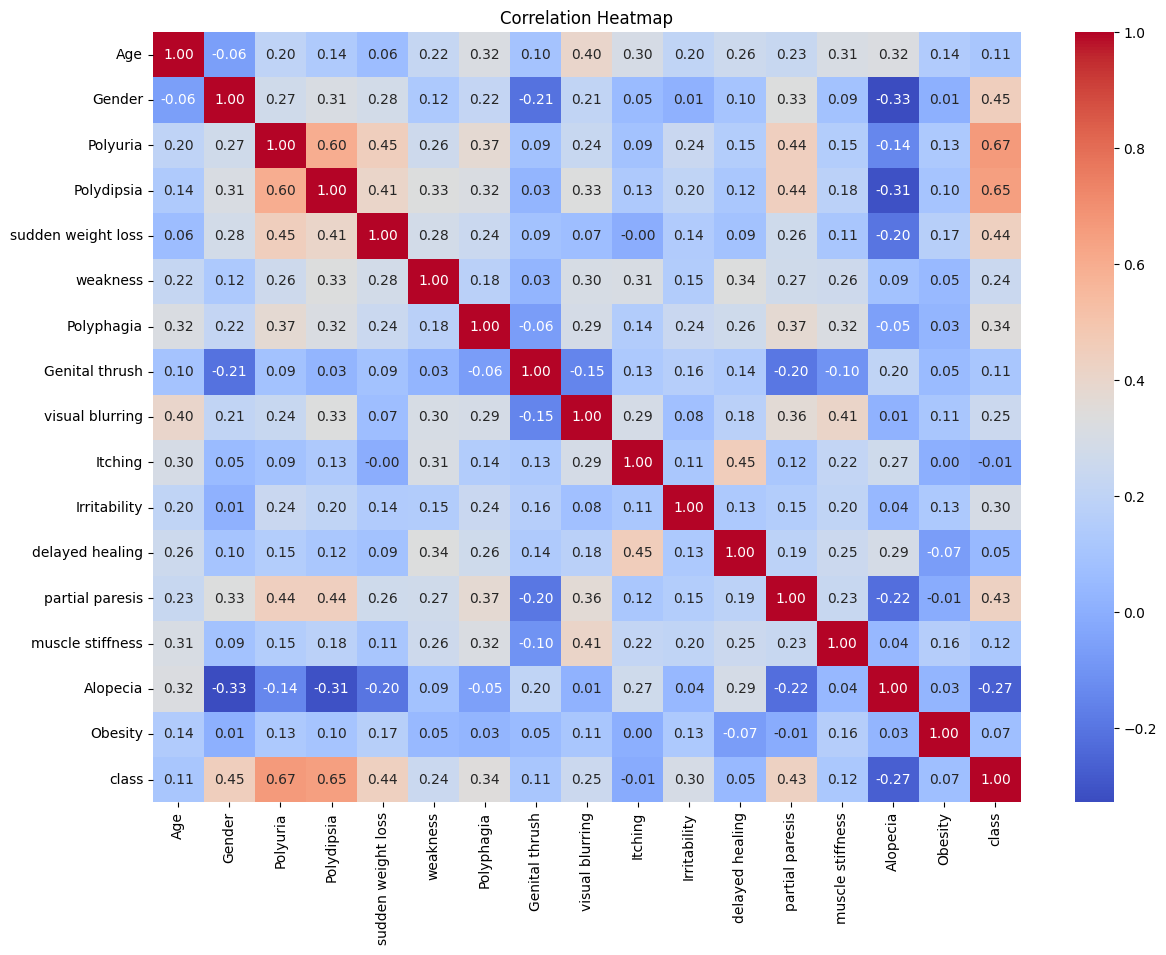

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

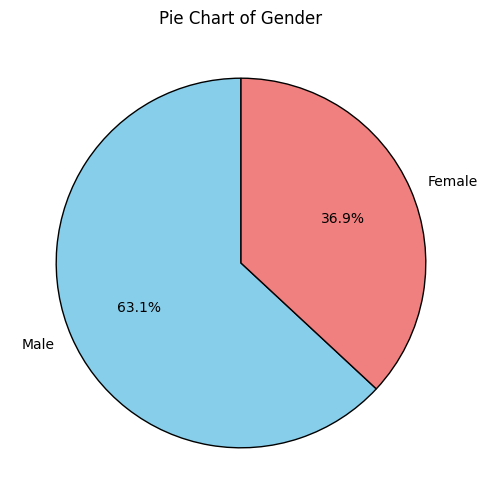

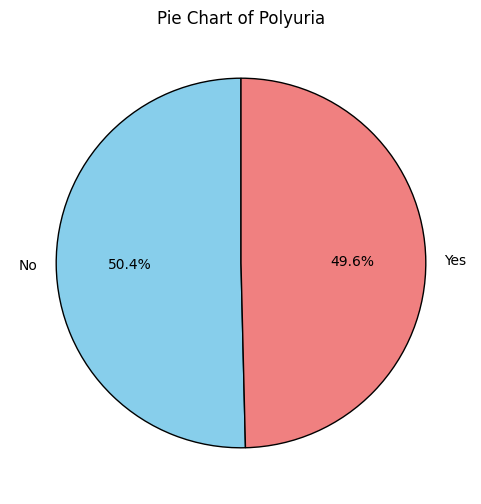

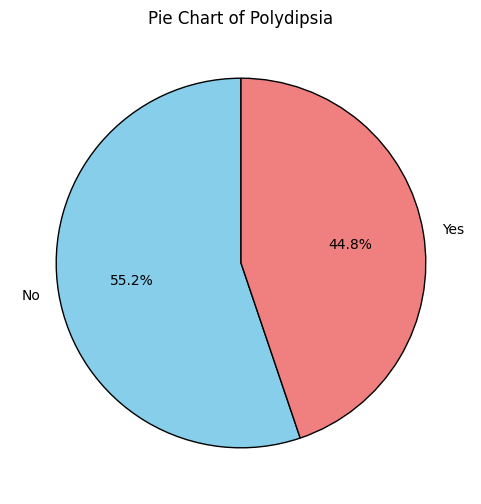

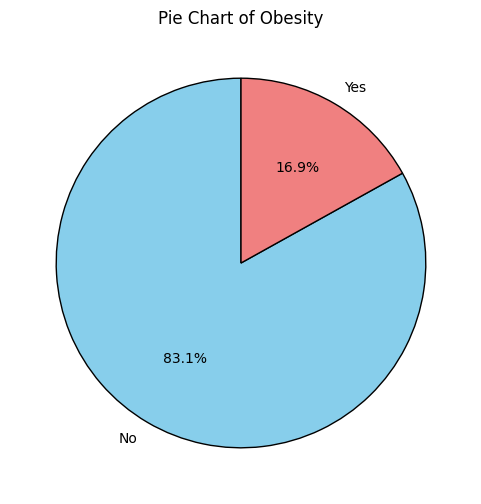

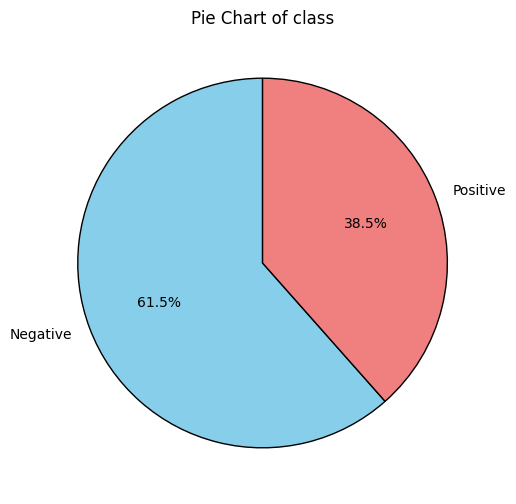

In [ ]:
# Function to plot pie charts with labels for selected categorical variables
def plot_piecharts(df):
    # Define labels for each categorical variable
    pie_labels = {
        'Gender': ['Male', 'Female'],
        'Polyuria': ['No', 'Yes'],
        'Polydipsia': ['No', 'Yes'],
        'Obesity': ['No', 'Yes'],
        'class': ['Negative', 'Positive']
    }

    categorical_columns = ['Gender', 'Polyuria', 'Polydipsia', 'Obesity', 'class']  # Selected columns for pie charts
    for column in categorical_columns:
        plt.figure(figsize=(6, 6))
        df[column].value_counts().plot.pie(
            labels=pie_labels[column],  # Use predefined labels
            autopct='%1.1f%%',
            colors=['skyblue', 'lightcoral'],
            startangle=90,
            wedgeprops={'edgecolor': 'black'}
        )
        plt.title(f'Pie Chart of {column}')
        plt.ylabel('')  # Hide y-axis label
        plt.show()

# Calling the pie chart plotting function
plot_piecharts(df)


<ipython-input-26-fe3d71af87b2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


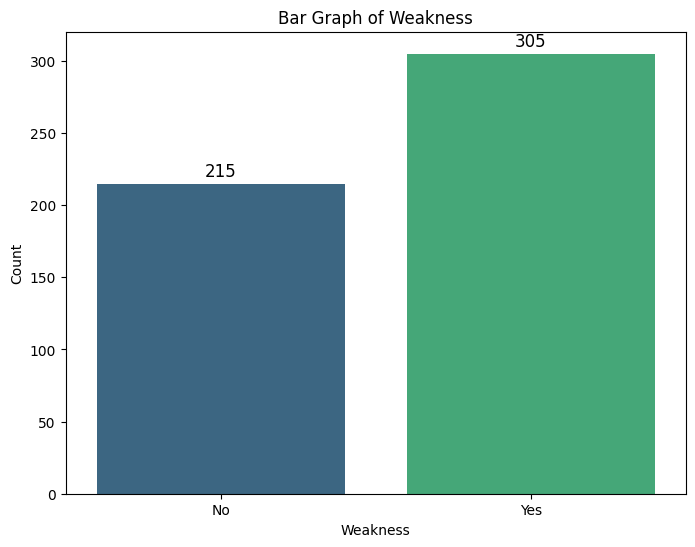

<ipython-input-26-fe3d71af87b2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


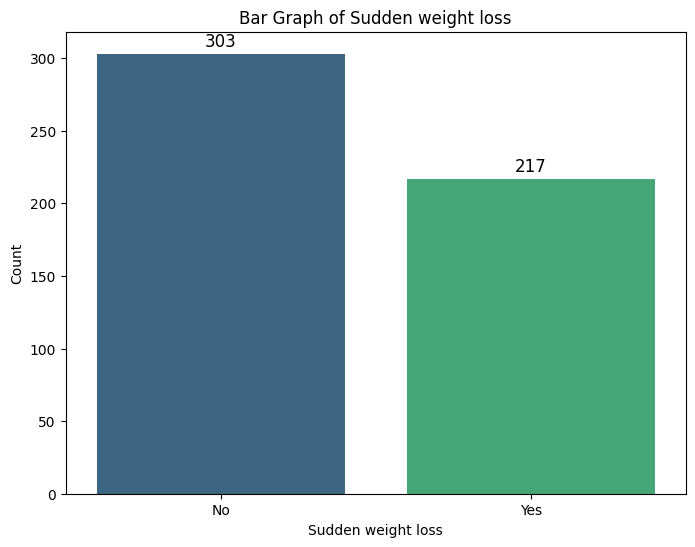

<ipython-input-26-fe3d71af87b2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


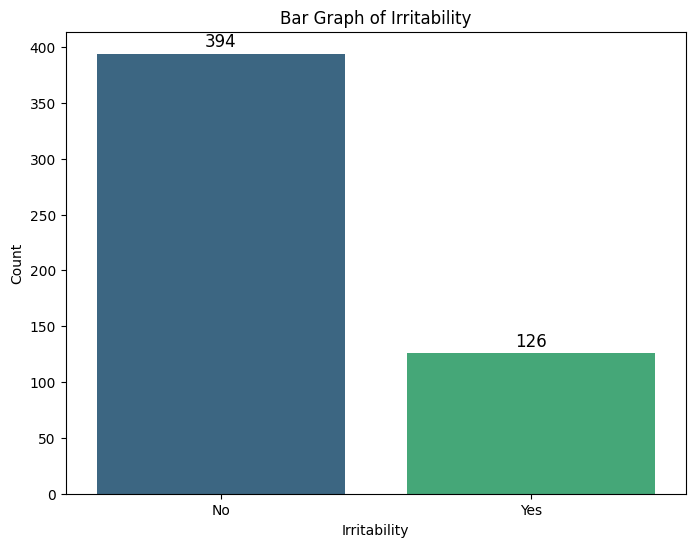

<ipython-input-26-fe3d71af87b2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


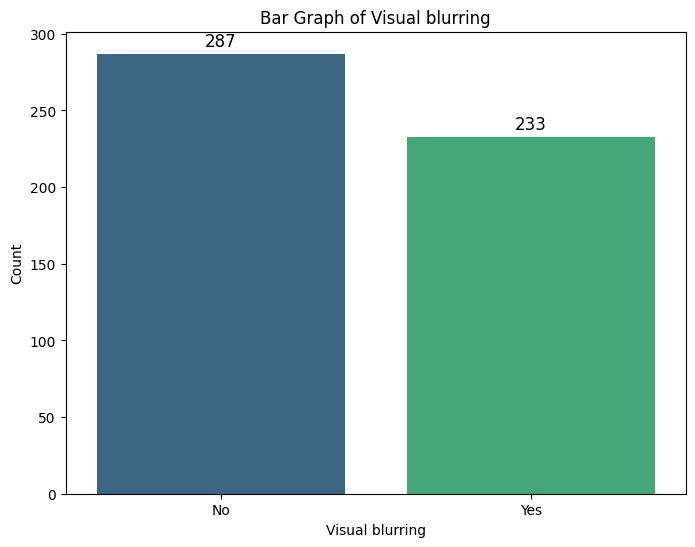

<ipython-input-26-fe3d71af87b2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


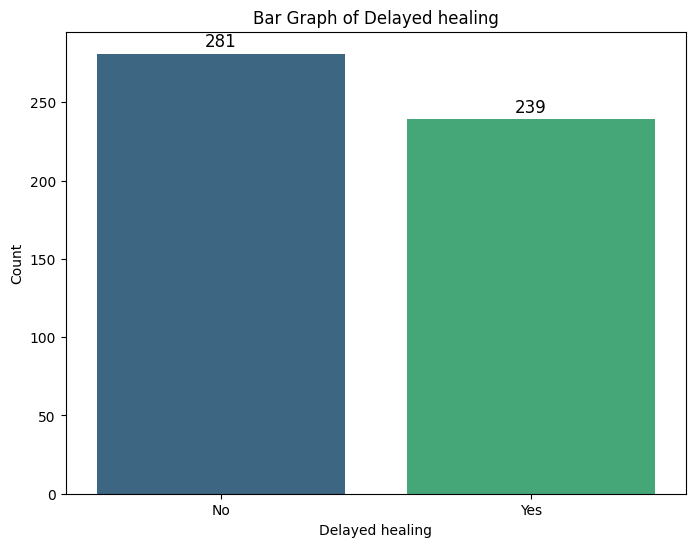

In [ ]:


# Function to plot bar graphs for selected variables with counts
def plot_bargraphs(df):
    # Selected columns for bar graphs
    categorical_columns = ['weakness', 'sudden weight loss', 'Irritability', 'visual blurring', 'delayed healing']

    for column in categorical_columns:
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(x=column, data=df, palette='viridis')
        plt.title(f'Bar Graph of {column.capitalize()}')
        plt.xlabel(column.capitalize())
        plt.ylabel('Count')
        plt.xticks([0, 1], ['No', 'Yes'])  # Customizing x-axis labels

        # Adding count labels on the bars
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'baseline', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

        plt.show()
plot_bargraphs(df)


<Figure size 800x600 with 0 Axes>

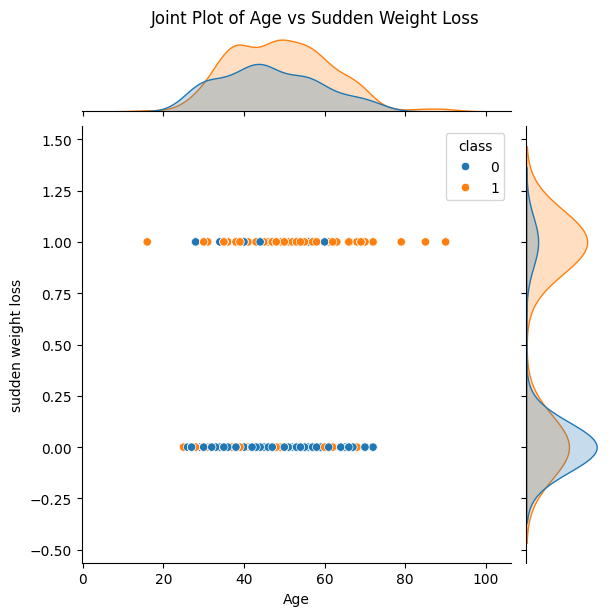

In [ ]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='Age', y='sudden weight loss', data=df, kind='scatter', hue='class')
plt.suptitle('Joint Plot of Age vs Sudden Weight Loss', y=1.02)
plt.show()

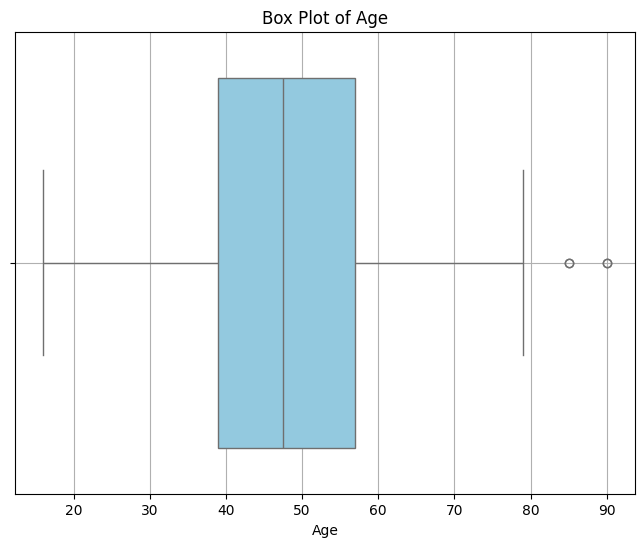

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

In [94]:
import statsmodels.api as sm
X = df.drop('class', axis=1)
y = df['class']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     59.01
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          2.74e-104
Time:                        05:19:09   Log-Likelihood:                -88.436
No. Observations:                 520   AIC:                             210.9
Df Residuals:                     503   BIC:                             283.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1909      0

In [96]:
# Assuming `model` is your already fitted OLS model and `X` is your predictors DataFrame with a constant added

# Extract p-values from the fitted model
pvalues = model.pvalues

# Iteratively remove variables with p-values greater than 0.05
while pvalues.max() > 0.05:
    # Find the variable with the highest p-value
    max_pvalue_variable = pvalues.idxmax()
    max_pvalue = pvalues.max()

    # Print the variable being removed and its p-value
    print(f"Removing {max_pvalue_variable} with p-value {max_pvalue:.4f}")

    # Remove the variable from the predictors DataFrame
    X = X.drop(max_pvalue_variable, axis=1)

    # Refit the model with the updated predictors
    model = sm.OLS(y, X).fit()

    # Update p-values after refitting the model
    pvalues = model.pvalues

# Display the final model summary
print("Final Model Summary:")
print(model.summary())
print(X.head())


Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     116.2
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          7.48e-110
Time:                        05:19:49   Log-Likelihood:                -93.694
No. Observations:                 520   AIC:                             205.4
Df Residuals:                     511   BIC:                             243.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for the current set of predictors
vif_data = calculate_vif(X)
print("Initial VIF Data:")
print(vif_data)

# Iteratively remove variables with VIF > 10
while True:
    # Calculate VIF for the current set of predictors
    vif_data = calculate_vif(X)
    max_vif = vif_data['VIF'].max()  # Find the maximum VIF value
    if max_vif > 10:
        # Remove the variable with the highest VIF
        max_vif_variable = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
        print(f"Removing {max_vif_variable} with VIF {max_vif:.2f}")
        X = X.drop(max_vif_variable, axis=1)
    else:
        break  # Stop if all VIFs are less than or equal to 10

# Display the final VIF data
print("Final VIF Data:")
print(calculate_vif(X))
print(X.head())

Initial VIF Data:
          Variable       VIF
0            const  3.564732
1           Gender  1.229030
2         Polyuria  1.740387
3       Polydipsia  1.722390
4   Genital thrush  1.192435
5          Itching  1.280031
6     Irritability  1.106360
7  delayed healing  1.321452
8  partial paresis  1.504760
Final VIF Data:
          Variable       VIF
0            const  3.564732
1           Gender  1.229030
2         Polyuria  1.740387
3       Polydipsia  1.722390
4   Genital thrush  1.192435
5          Itching  1.280031
6     Irritability  1.106360
7  delayed healing  1.321452
8  partial paresis  1.504760
   const  Gender  Polyuria  Polydipsia  Genital thrush  Itching  Irritability  \
0    1.0       0         0           1               0        1             0   
1    1.0       0         0           0               0        0             0   
2    1.0       0         1           0               0        1             0   
3    1.0       0         0           0               1        

In [132]:
#model1:Considering all the varaibles
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


# Define the target variable (Assuming 'class' is the target)
y = df['class']

# Define the independent variables (all columns except the target)
X1 = df.drop('class', axis=1)

# Standardize the features
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# List of test sizes to evaluate
test_sizes = [0.2, 0.25, 0.3, 0.4]

# List of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=50),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(probability=True, random_state=50),
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Random Forest': RandomForestClassifier(random_state=50),
    'Gradient Boosting': GradientBoostingClassifier(random_state=50),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
}

# Dictionary to store results for each algorithm
results = {name: [] for name in classifiers.keys()}

# Evaluate each classifier for different test splits
for test_size in test_sizes:
    # Split the data into training and testing sets
    X1_train, X1_test, y_train, y_test = train_test_split(X1_scaled, y, test_size=test_size, random_state=50)

    for name, clf in classifiers.items():
        # Fit the classifier
        clf.fit(X1_train, y_train)

        # Make predictions on the test set
        y_pred = clf.predict(X1_test)

        # Evaluate classification metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store the results
        results[name].append((test_size, accuracy, precision, recall, f1))
print(X1)
# Display the results for each classifier
for name, metrics in results.items():
    print(f"\n{name} Evaluation Metrics for Different Test Splits:")
    for test_size, accuracy, precision, recall, f1 in metrics:
        print(f"\nTest Size: {test_size}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")





/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:51:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:51:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:51:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       0         0           1                   0         1   
1     58       0         0           0                   0         1   
2     41       0         1           0                   0         1   
3     45       0         0           0                   1         1   
4     60       0         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       1         1           1                   1         0   
516   48       1         1           1                   1         1   
517   58       1         1           1                   1         1   
518   32       1         0           0                   0         1   
519   42       0         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0               0                0        1   

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:51:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


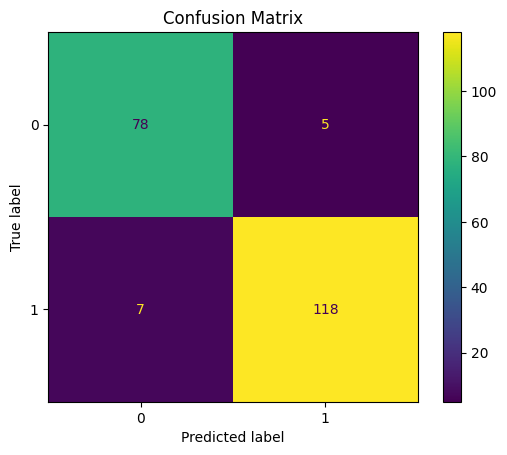


Comparison of Observed and Predicted Values:
     Observed  Predicted
23          1          1
399         0          0
393         0          0
236         0          0
102         1          1
..        ...        ...
491         0          0
368         1          1
208         0          0
210         0          0
263         1          1

[208 rows x 2 columns]


In [133]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix")
plt.show()

# Optional: Display comparison of actual vs predicted
comparison = pd.DataFrame({'Observed': y_test, 'Predicted': y_pred})
print("\nComparison of Observed and Predicted Values:")
print(comparison)

In [134]:
# Summary of results
summary = []

# Collect summary statistics
for name, metrics in results.items():
    for test_size, accuracy, precision, recall, f1 in metrics: # Changed this line to iterate over tuple elements
        summary.append([name, test_size, accuracy, precision, recall, f1]) # Access tuple elements using their position

# Create a DataFrame for better visualization
summary_df = pd.DataFrame(summary, columns=['Model', 'Test Size', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the summary of performance metrics
print("\nSummary of Model Performances:")
print(summary_df)

# Aggregate metrics to find the best performing model
best_models = summary_df.groupby('Model').mean().sort_values(by='F1 Score', ascending=False)

# Display the best performing models based on average F1 Score
print("\nBest Performing Models Based on Average F1 Score:")
print(best_models)


Summary of Model Performances:
                     Model  Test Size  Accuracy  Precision    Recall  F1 Score
0      Logistic Regression       0.20  0.903846   0.866667  0.962963  0.912281
1      Logistic Regression       0.25  0.923077   0.918919  0.944444  0.931507
2      Logistic Regression       0.30  0.923077   0.924731  0.945055  0.934783
3      Logistic Regression       0.40  0.932692   0.951220  0.936000  0.943548
4      K-Nearest Neighbors       0.20  0.951923   0.962264  0.944444  0.953271
5      K-Nearest Neighbors       0.25  0.946154   0.971014  0.930556  0.950355
6      K-Nearest Neighbors       0.30  0.942308   0.976744  0.923077  0.949153
7      K-Nearest Neighbors       0.40  0.918269   0.990909  0.872000  0.927660
8   Support Vector Machine       0.20  0.951923   0.945455  0.962963  0.954128
9   Support Vector Machine       0.25  0.946154   0.957746  0.944444  0.951049
10  Support Vector Machine       0.30  0.955128   0.966667  0.956044  0.961326
11  Support Vector M

In [135]:
#model2:After removing multicollinear variables
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List of test sizes to evaluate
test_sizes = [0.2, 0.25, 0.3, 0.4]

# List of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=50),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(probability=True, random_state=50),
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Random Forest': RandomForestClassifier(random_state=50),
    'Gradient Boosting': GradientBoostingClassifier(random_state=50),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=50)
}

# Dictionary to store results for each algorithm
results = {name: [] for name in classifiers.keys()}

# Evaluate each classifier for different test splits
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=50)

    for name, clf in classifiers.items():
        # Fit the classifier
        clf.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Evaluate classification metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store the results
        results[name].append((test_size, accuracy, precision, recall, f1))
print(X)
# Display the results for each classifier
for name, metrics in results.items():
    print(f"\n{name} Evaluation Metrics for Different Test Splits:")
    for test_size, accuracy, precision, recall, f1 in metrics:
        print(f"\nTest Size: {test_size}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:51:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:51:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:51:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


     const  Gender  Polyuria  Polydipsia  Genital thrush  Itching  \
0      1.0       0         0           1               0        1   
1      1.0       0         0           0               0        0   
2      1.0       0         1           0               0        1   
3      1.0       0         0           0               1        1   
4      1.0       0         1           1               0        1   
..     ...     ...       ...         ...             ...      ...   
515    1.0       1         1           1               0        1   
516    1.0       1         1           1               0        1   
517    1.0       1         1           1               0        0   
518    1.0       1         0           0               0        1   
519    1.0       0         0           0               0        0   

     Irritability  delayed healing  partial paresis  
0               0                1                0  
1               0                0                1  
2        

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:51:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


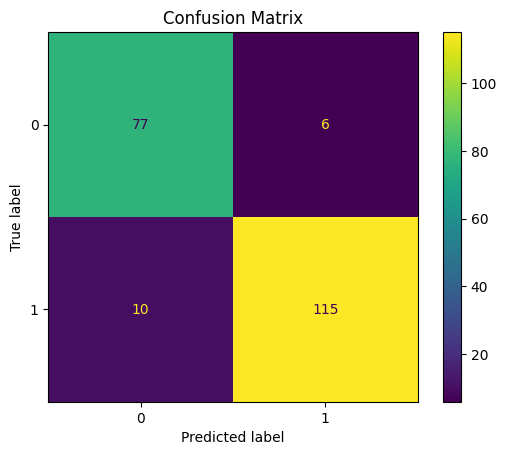


Comparison of Observed and Predicted Values:
     Observed  Predicted
23          1          1
399         0          0
393         0          0
236         0          0
102         1          1
..        ...        ...
491         0          0
368         1          1
208         0          0
210         0          0
263         1          1

[208 rows x 2 columns]


In [136]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix")
plt.show()

# Optional: Display comparison of actual vs predicted
comparison = pd.DataFrame({'Observed': y_test, 'Predicted': y_pred})
print("\nComparison of Observed and Predicted Values:")
print(comparison)

In [140]:
# Summary of results
summary = []

# Collect summary statistics
for name, metrics in results.items():
    for test_size, accuracy, precision, recall, f1 in metrics: # Changed this line to iterate over tuple elements
        summary.append([name, test_size, accuracy, precision, recall, f1]) # Access tuple elements using their position

# Create a DataFrame for better visualization
summary_df = pd.DataFrame(summary, columns=['Model', 'Test Size', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the summary of performance metrics
print("\nSummary of Model Performances:")
print(summary_df)

# Aggregate metrics to find the best performing model
best_models = summary_df.groupby('Model').mean().sort_values(by='F1 Score', ascending=False)

# Display the best performing models based on average F1 Score
print("\nBest Performing Models Based on Average F1 Score:")
print(best_models)


Summary of Model Performances:
                     Model  Test Size  Accuracy  Precision    Recall  F1 Score
0      Logistic Regression       0.20  0.884615   0.838710  0.962963  0.896552
1      Logistic Regression       0.25  0.907692   0.875000  0.972222  0.921053
2      Logistic Regression       0.30  0.903846   0.904255  0.934066  0.918919
3      Logistic Regression       0.40  0.908654   0.920635  0.928000  0.924303
4      K-Nearest Neighbors       0.20  0.855769   0.854545  0.870370  0.862385
5      K-Nearest Neighbors       0.25  0.892308   0.902778  0.902778  0.902778
6      K-Nearest Neighbors       0.30  0.891026   0.920455  0.890110  0.905028
7      K-Nearest Neighbors       0.40  0.884615   0.917355  0.888000  0.902439
8   Support Vector Machine       0.20  0.913462   0.881356  0.962963  0.920354
9   Support Vector Machine       0.25  0.923077   0.897436  0.972222  0.933333
10  Support Vector Machine       0.30  0.929487   0.916667  0.967033  0.941176
11  Support Vector M

In [138]:
# Summary of results
summary = []

# Collect summary statistics
for name, metrics in results.items():
    for metric in metrics:
        summary.append([name, metric[0], metric[1], metric[2], metric[3], metric[4]]) # Access tuple elements using integer indices

# Create a DataFrame for better visualization
summary_df = pd.DataFrame(summary, columns=['Model', 'Test Size', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the summary of performance metrics
print("\nSummary of Model Performances:")
print(summary_df)

# Aggregate metrics to find the best performing model
best_models = summary_df.groupby('Model').mean().sort_values(by='Accuracy', ascending=False)

# Display the best performing models based on average Accuracy Score
print("\nBest Performing Models Based on Average Accuracy Score:")
print(best_models)


Summary of Model Performances:
                     Model  Test Size  Accuracy  Precision    Recall  F1 Score
0      Logistic Regression       0.20  0.884615   0.838710  0.962963  0.896552
1      Logistic Regression       0.25  0.907692   0.875000  0.972222  0.921053
2      Logistic Regression       0.30  0.903846   0.904255  0.934066  0.918919
3      Logistic Regression       0.40  0.908654   0.920635  0.928000  0.924303
4      K-Nearest Neighbors       0.20  0.855769   0.854545  0.870370  0.862385
5      K-Nearest Neighbors       0.25  0.892308   0.902778  0.902778  0.902778
6      K-Nearest Neighbors       0.30  0.891026   0.920455  0.890110  0.905028
7      K-Nearest Neighbors       0.40  0.884615   0.917355  0.888000  0.902439
8   Support Vector Machine       0.20  0.913462   0.881356  0.962963  0.920354
9   Support Vector Machine       0.25  0.923077   0.897436  0.972222  0.933333
10  Support Vector Machine       0.30  0.929487   0.916667  0.967033  0.941176
11  Support Vector M